In [1]:
# to access functions from root directory 
import sys
sys.path.append('/data/ad181/RemoteDir/multilevel_ppo')

In [2]:
%matplotlib notebook

import numpy as np
import pickle
import matplotlib.pyplot as plt
from copy import deepcopy
import os

from utils.plot_functions import plot_s_snapshots
from utils.env_evaluate_functions import eval_actions

In [3]:
seed=1
case = 'case_2'
opt_dir = './'+case
img_dir = './opt_images'

with open('../envs_params/env_data_v1/env_train_dict.pkl', 'rb') as input:
    envs = pickle.load(input)
rl_indices = list(range(16))
os.makedirs(img_dir, exist_ok=True)

In [4]:
fine_env = envs[4]
k_list = fine_env.ressim_params.k_list
envs = []
for k in k_list:
    env_ = deepcopy(fine_env)
    env_.set_k(np.array([k]))
    envs.append(env_)

/data/ad181/RemoteDir/multilevel_ppo/stable_baselines_mlppo/stable_baselines3/common/envs/multi_level_model/level_mapping_functions.py:51: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  for j in range(len(p_1)-1):


<IPython.core.display.Javascript object>


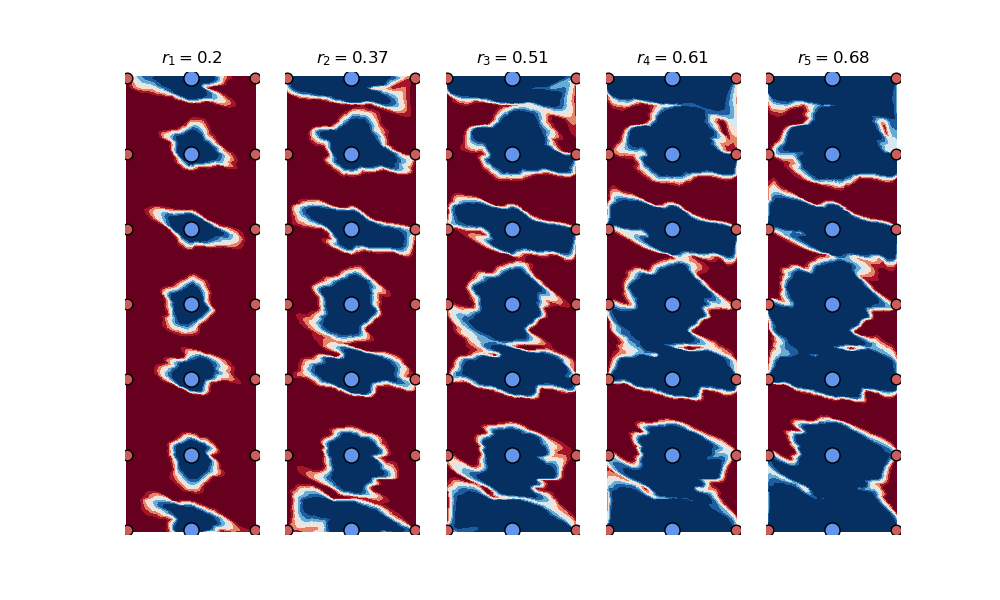

<IPython.core.display.Javascript object>


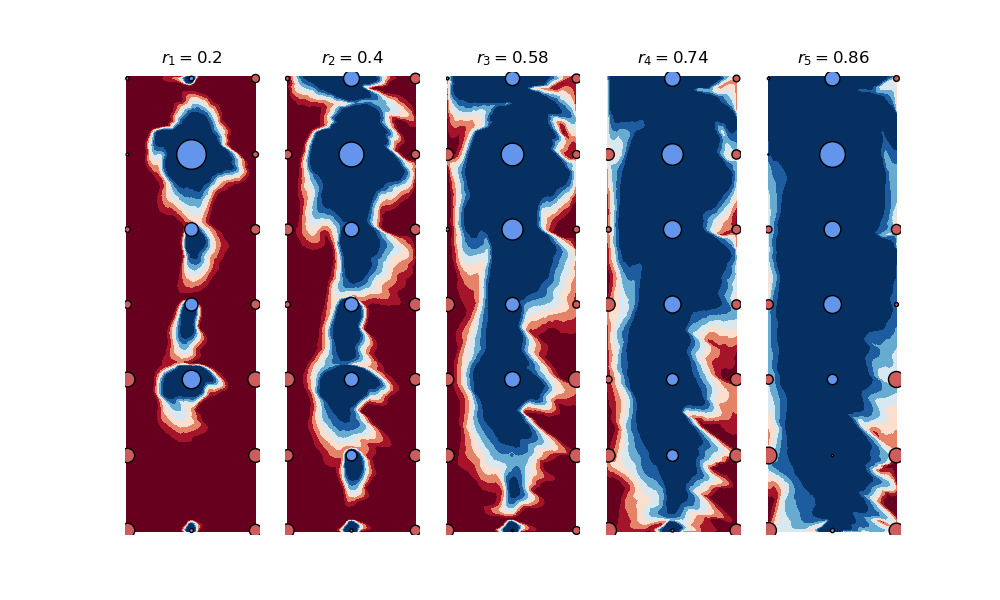

base: 0.6804264610872401
optimum: 0.8592962935596978
% improvement: 26


<IPython.core.display.Javascript object>


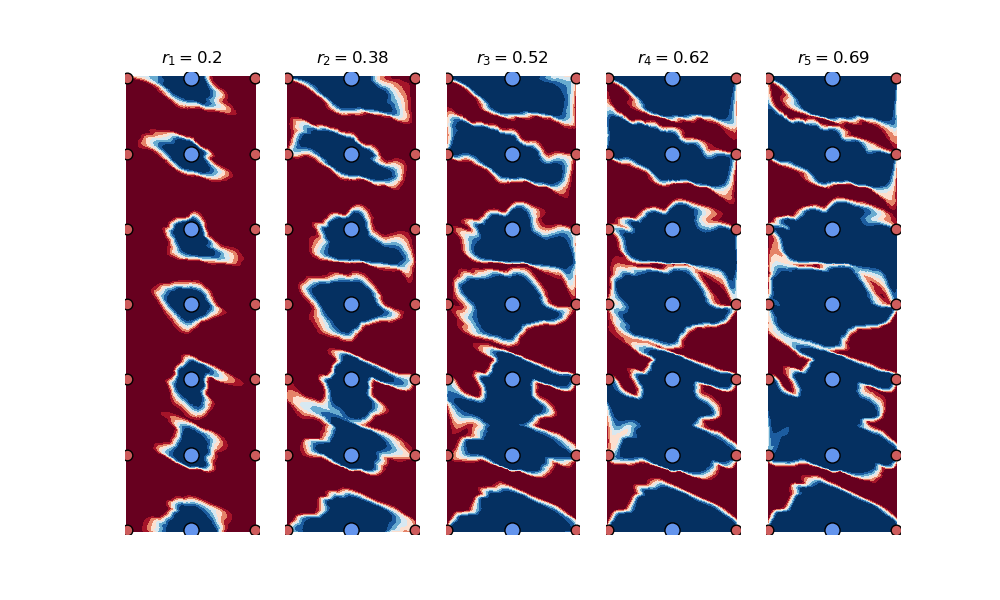

<IPython.core.display.Javascript object>


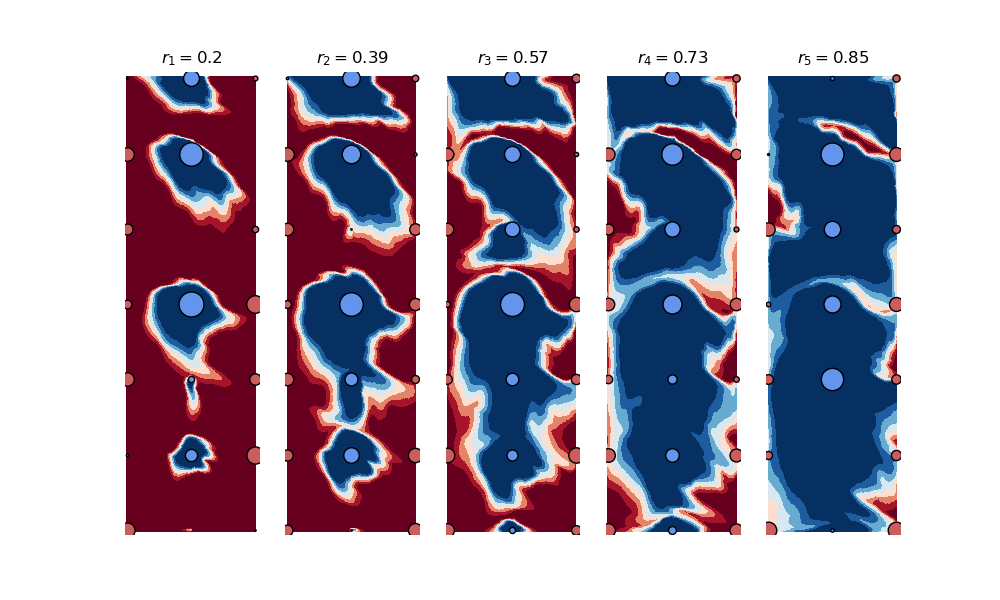

base: 0.6945188615868797
optimum: 0.8471523491703558
% improvement: 21


<IPython.core.display.Javascript object>


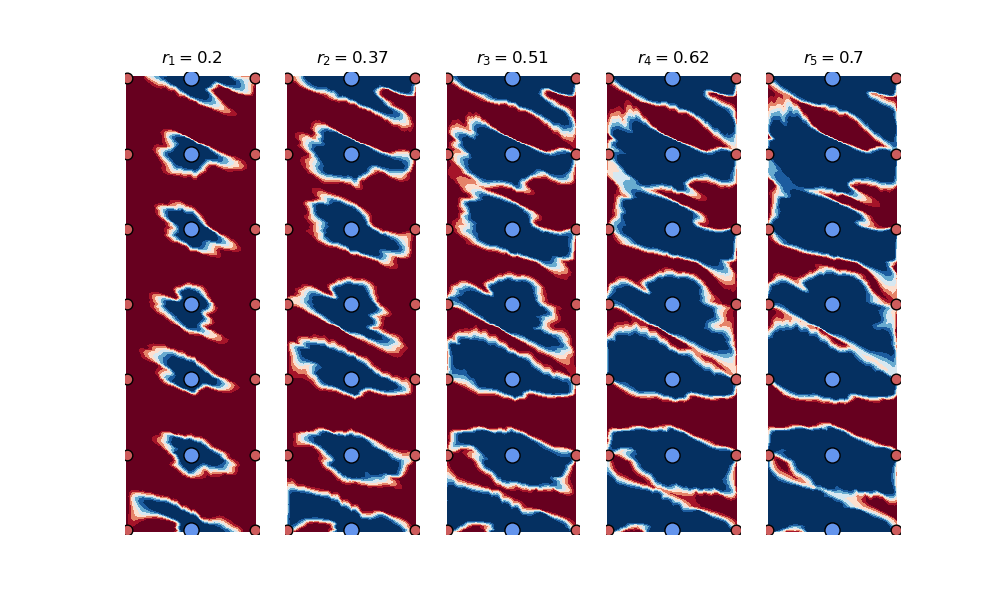

<IPython.core.display.Javascript object>


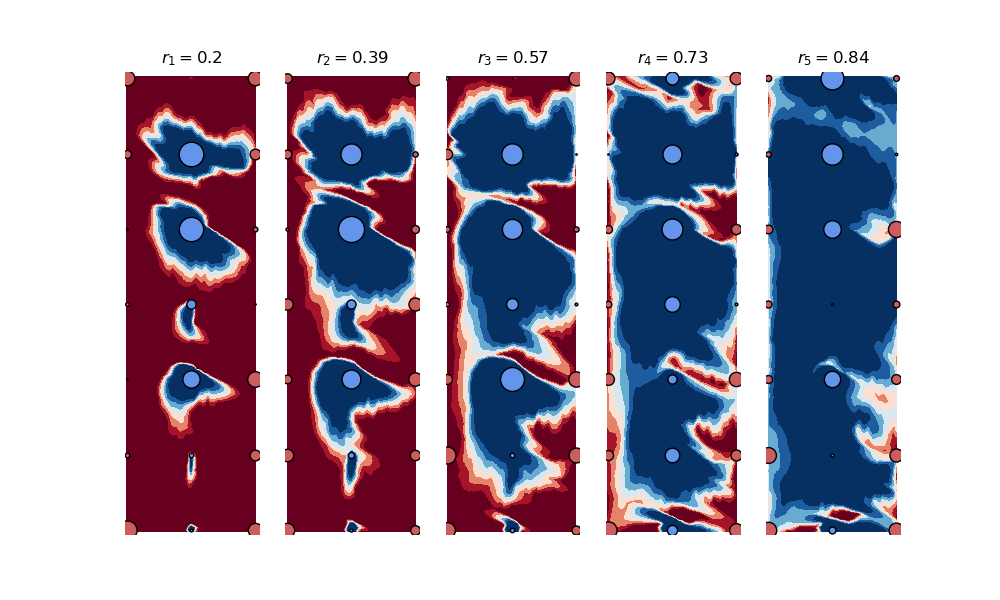

base: 0.6970962648785277
optimum: 0.8387970032284416
% improvement: 20


<IPython.core.display.Javascript object>


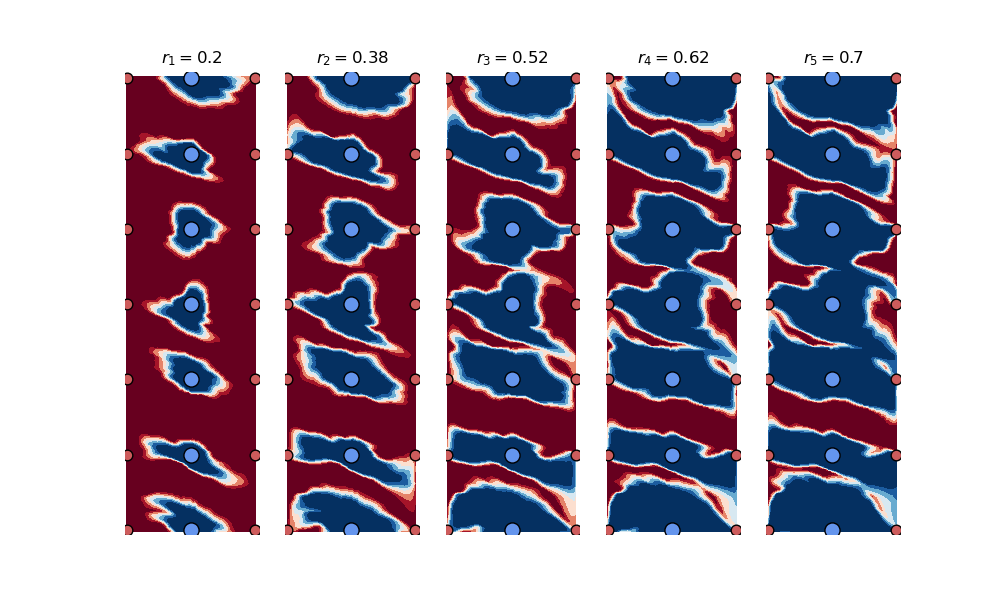

<IPython.core.display.Javascript object>


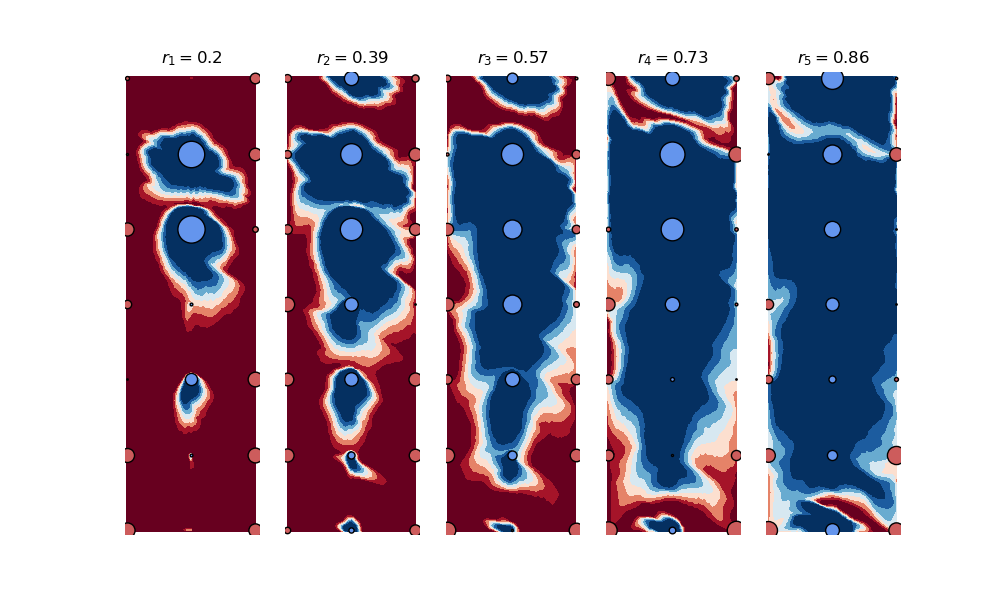

base: 0.7001144953737259
optimum: 0.8553765525783318
% improvement: 22


<IPython.core.display.Javascript object>


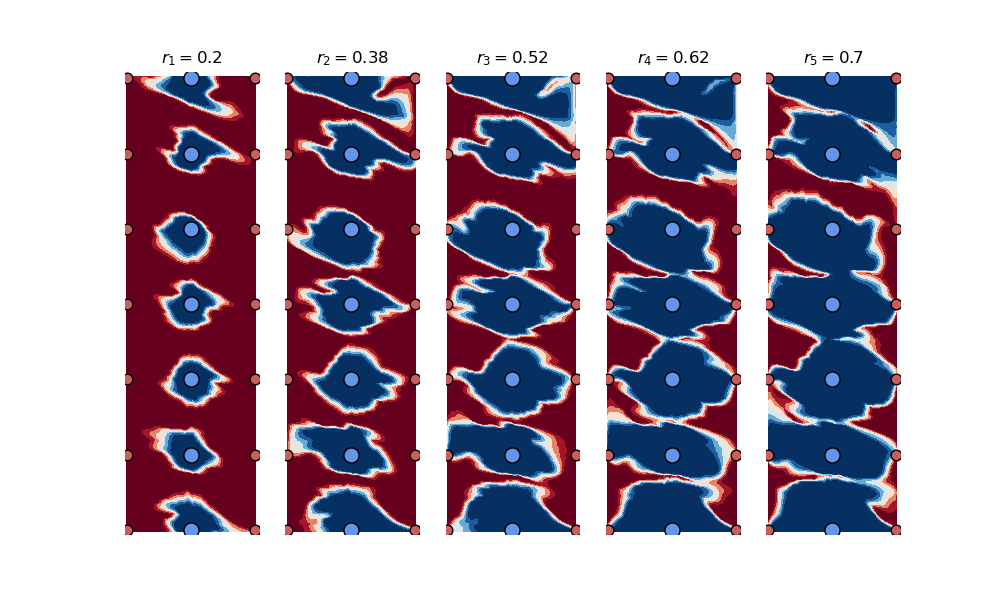

<IPython.core.display.Javascript object>


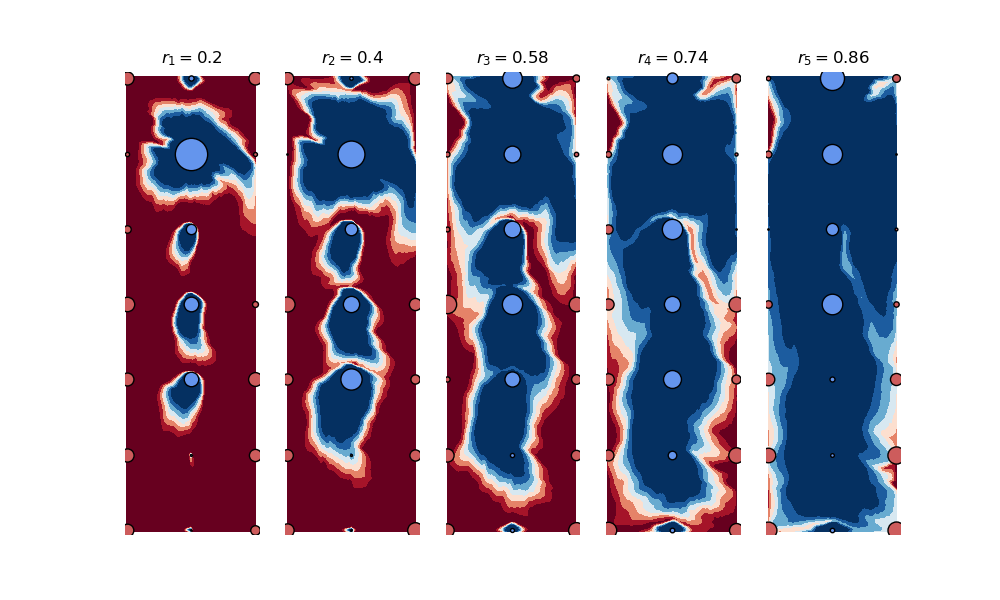

base: 0.7039855733110745
optimum: 0.8631691688824418
% improvement: 22


<IPython.core.display.Javascript object>


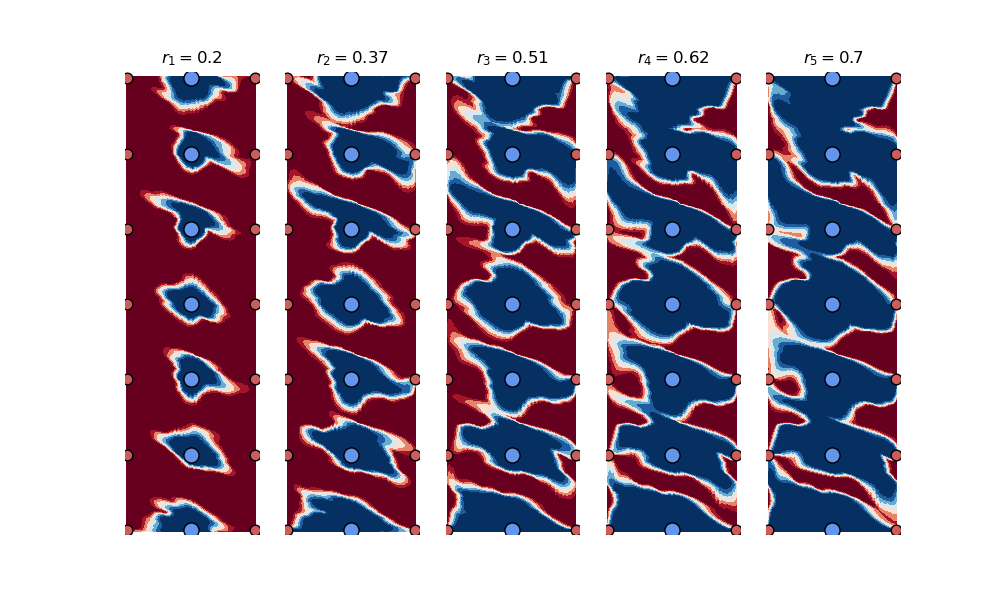

<IPython.core.display.Javascript object>


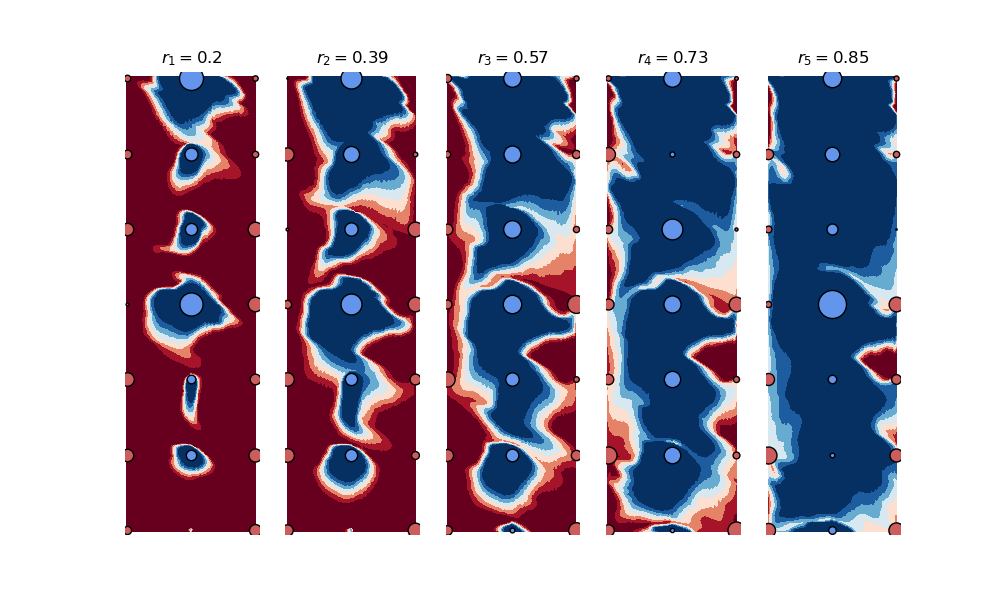

base: 0.701592685960709
optimum: 0.8489501494237881
% improvement: 21


<IPython.core.display.Javascript object>


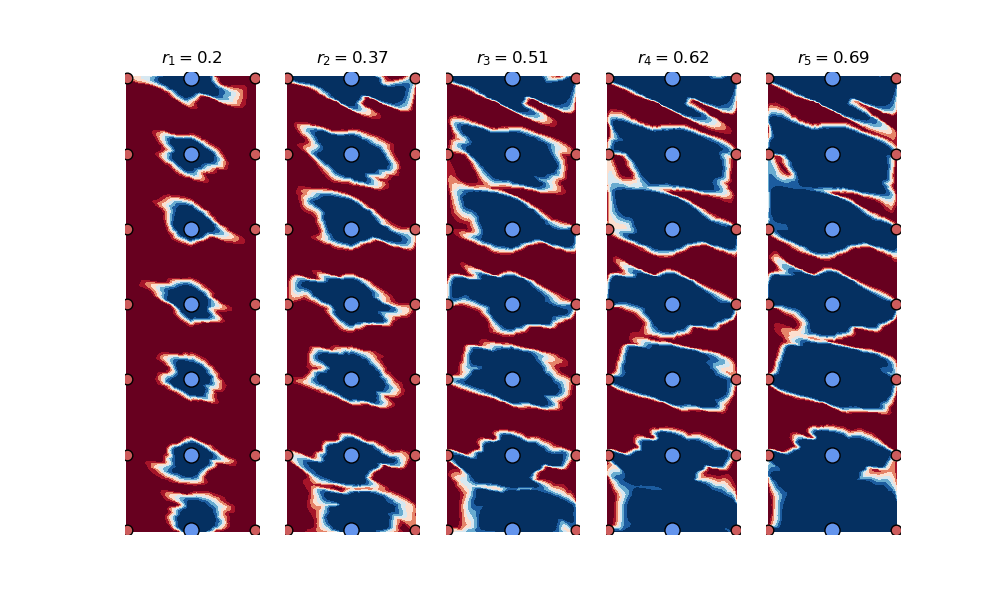

<IPython.core.display.Javascript object>


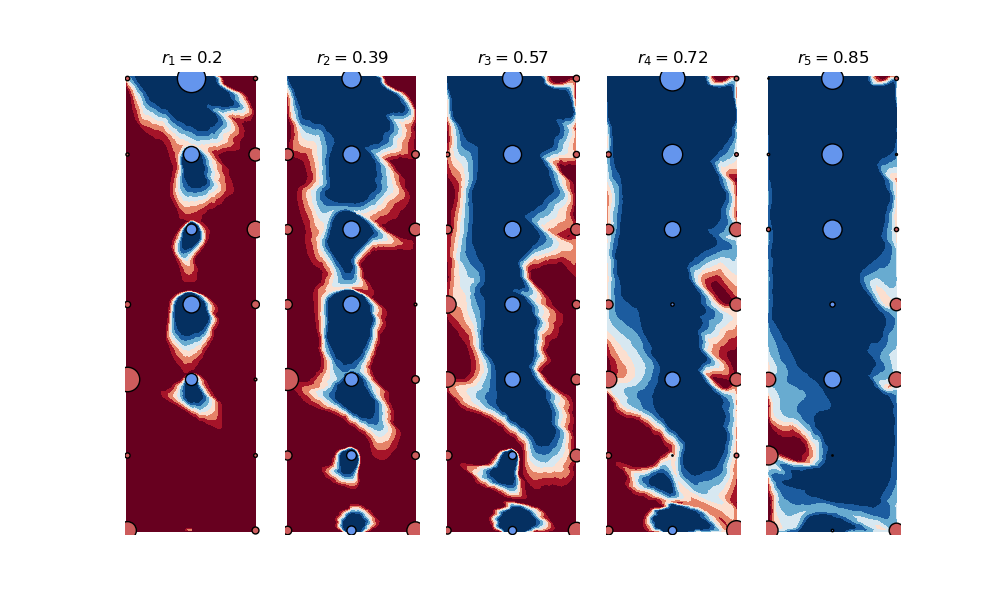

base: 0.6893918475383125
optimum: 0.8522802863600678
% improvement: 23


<IPython.core.display.Javascript object>


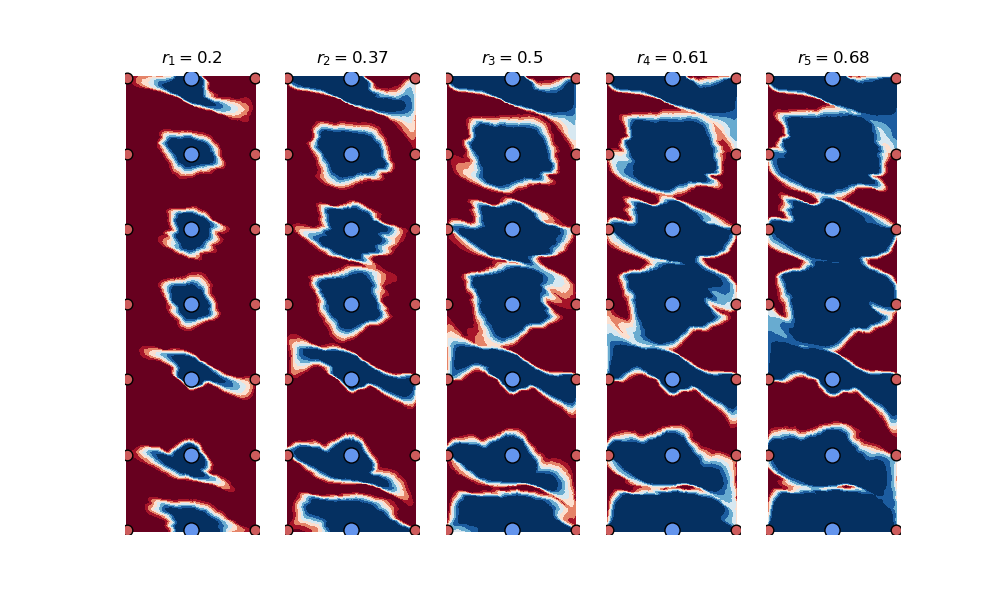

<IPython.core.display.Javascript object>


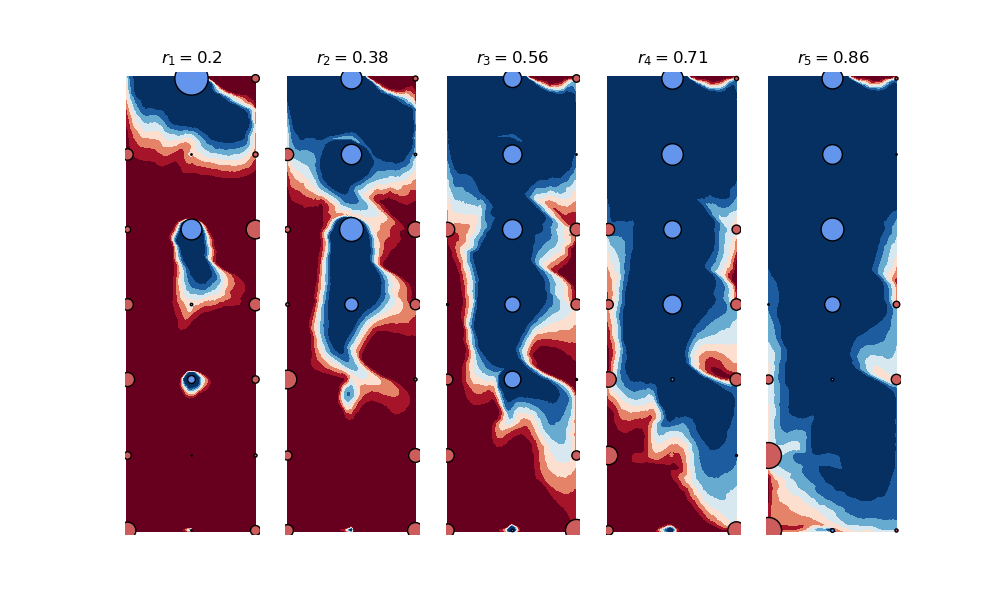

base: 0.6799941157148215
optimum: 0.8574734642798216
% improvement: 26


<IPython.core.display.Javascript object>


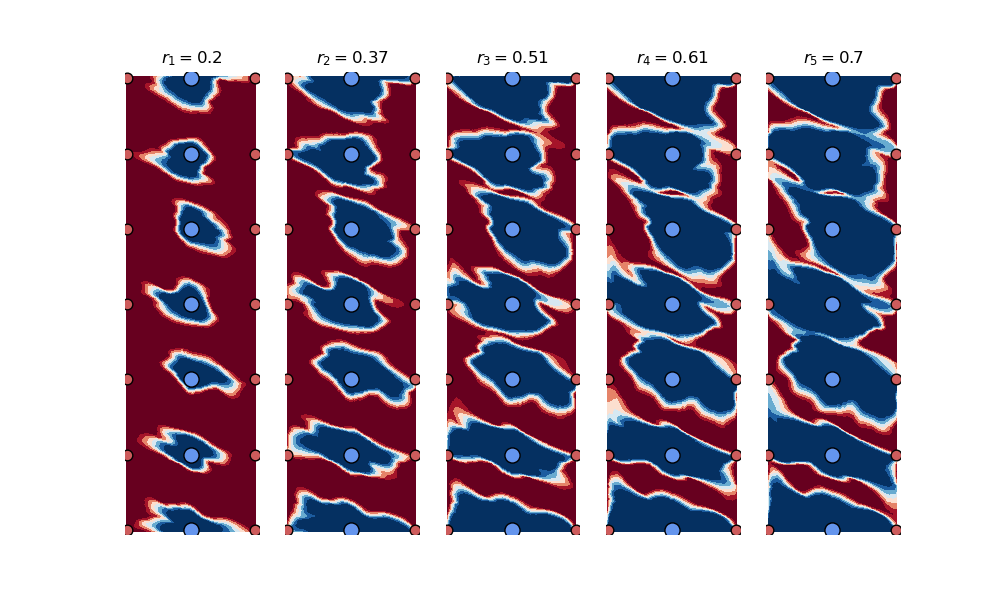

<IPython.core.display.Javascript object>


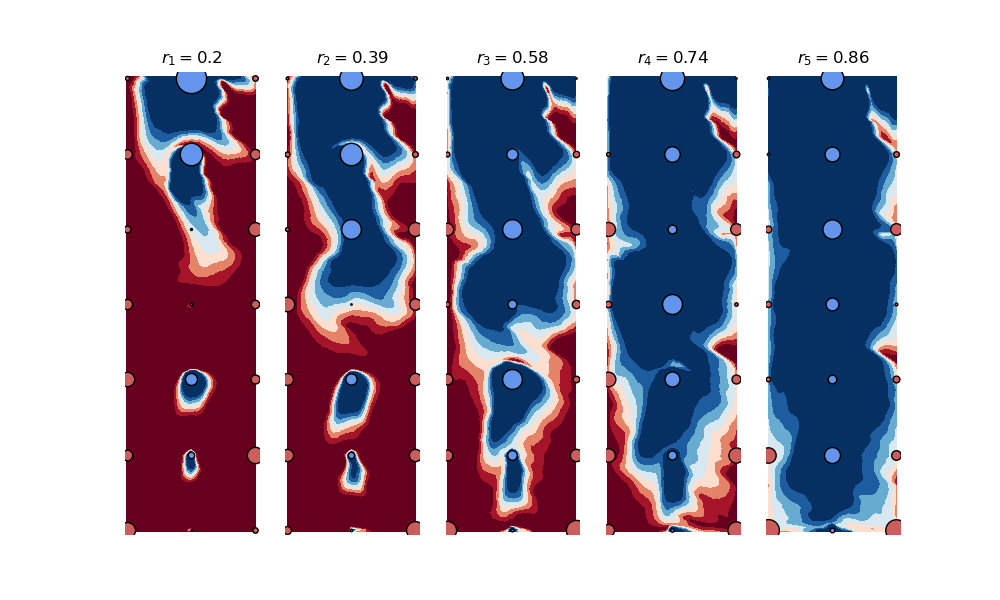

base: 0.6991415843827676
optimum: 0.862931517224617
% improvement: 23


<IPython.core.display.Javascript object>


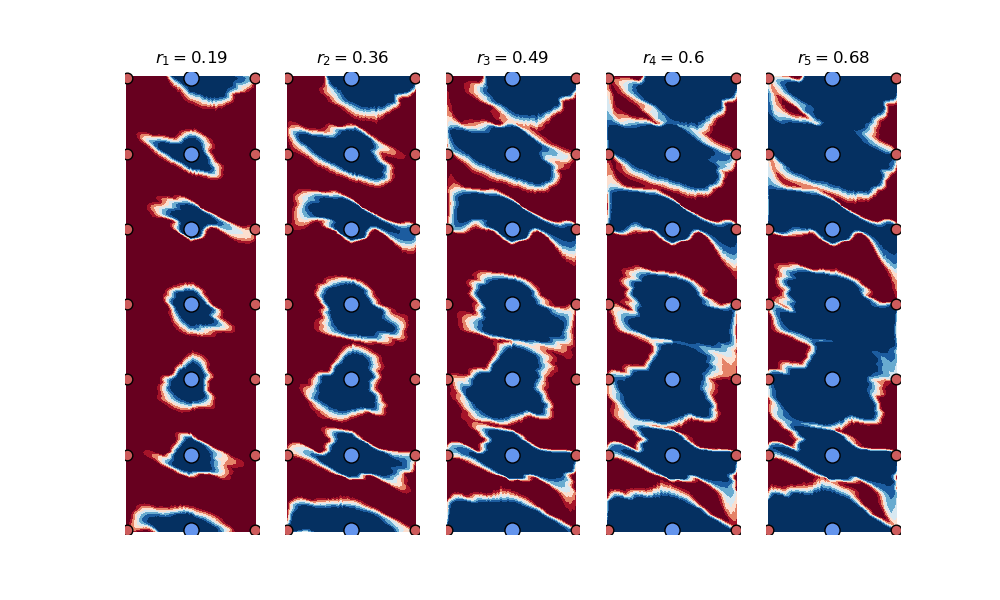

<IPython.core.display.Javascript object>


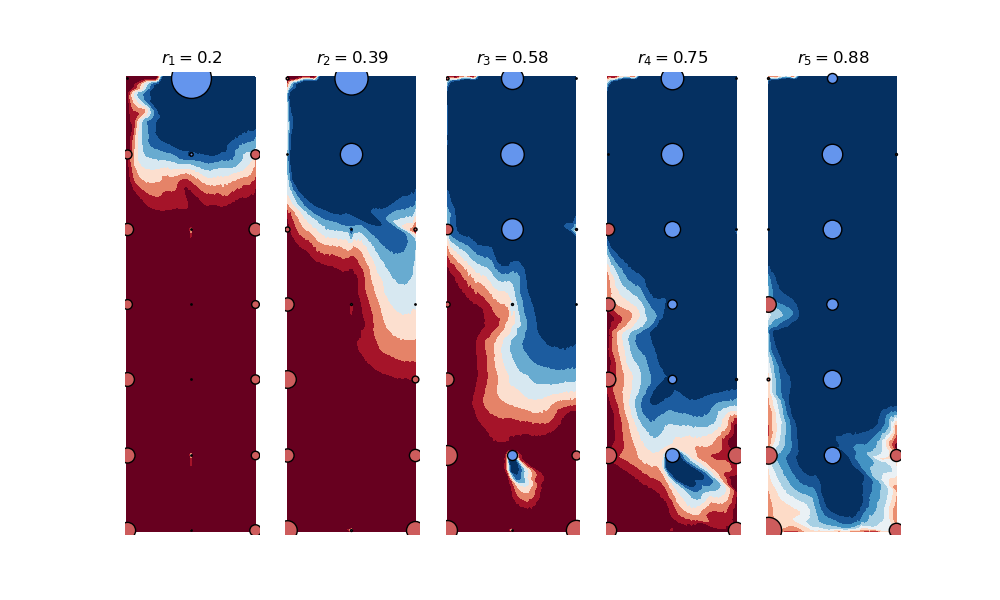

base: 0.6764537275031588
optimum: 0.8835526863101775
% improvement: 30


/data/ad181/RemoteDir/multilevel_ppo/utils/plot_functions.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,ctrl_steps,figsize=(round(figsize_scale*aspect)*ctrl_steps,figsize_scale) )


<IPython.core.display.Javascript object>


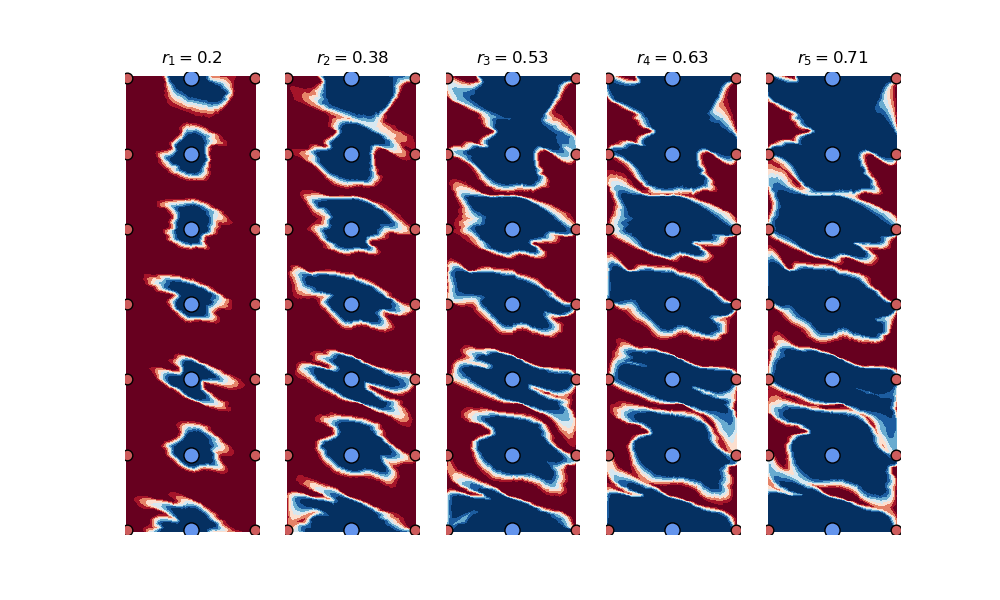

<IPython.core.display.Javascript object>


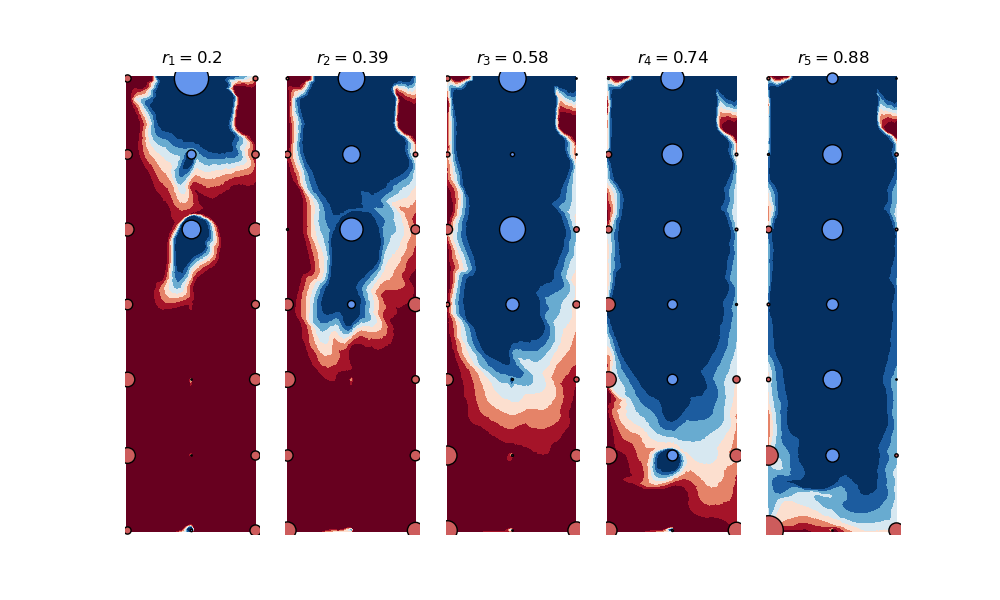

base: 0.7149914419545794
optimum: 0.8751240960892929
% improvement: 22


<IPython.core.display.Javascript object>


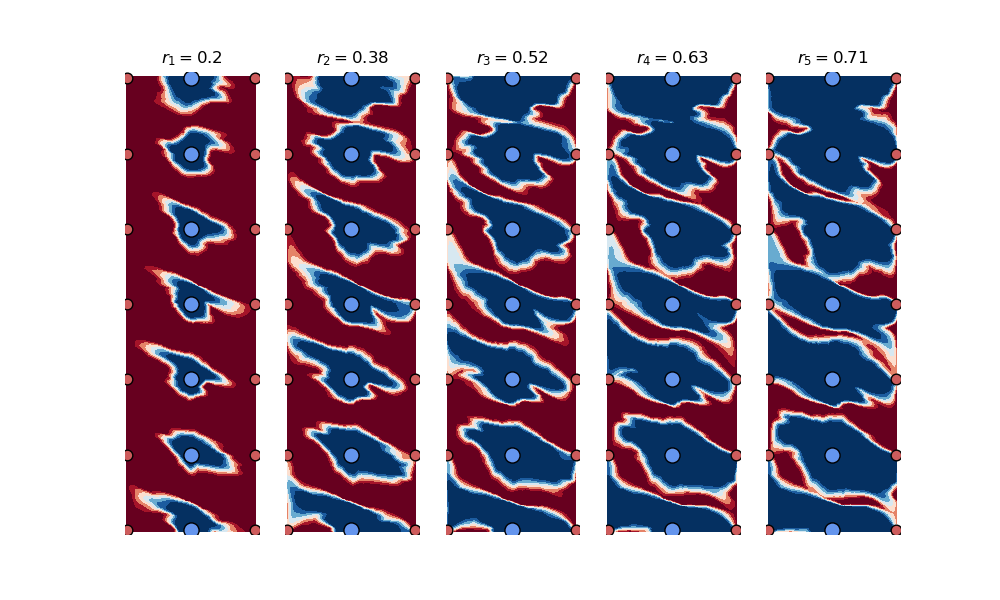

<IPython.core.display.Javascript object>


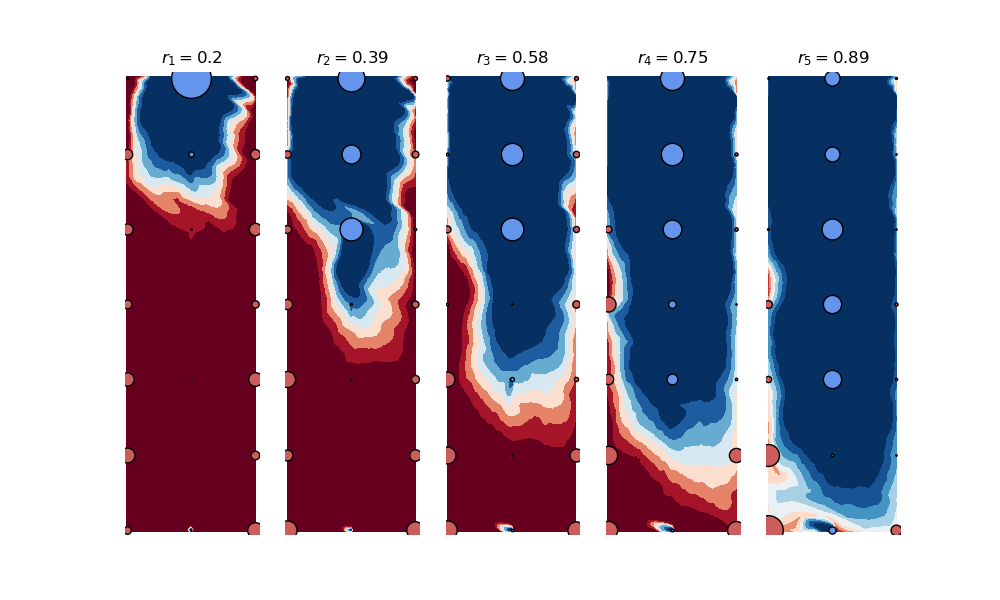

base: 0.7138844315804224
optimum: 0.8890896494775377
% improvement: 24


<IPython.core.display.Javascript object>


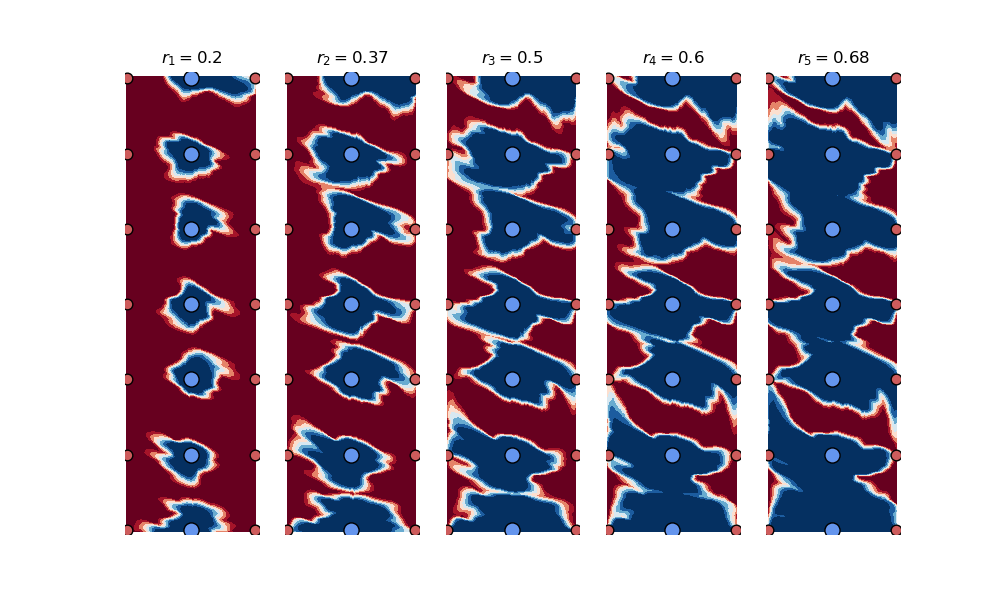

<IPython.core.display.Javascript object>


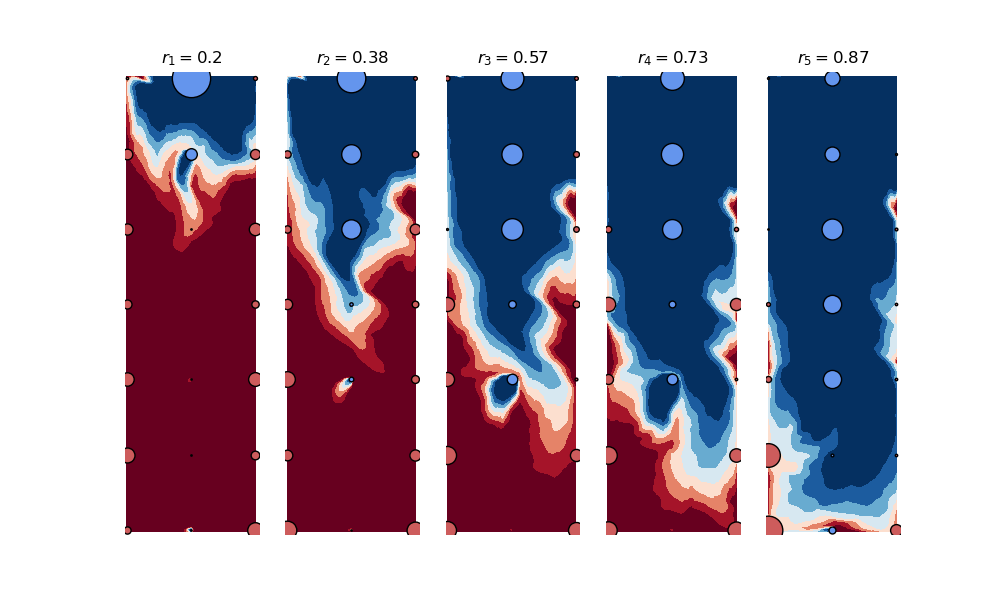

base: 0.6777543391686764
optimum: 0.8701937829614714
% improvement: 28


<IPython.core.display.Javascript object>


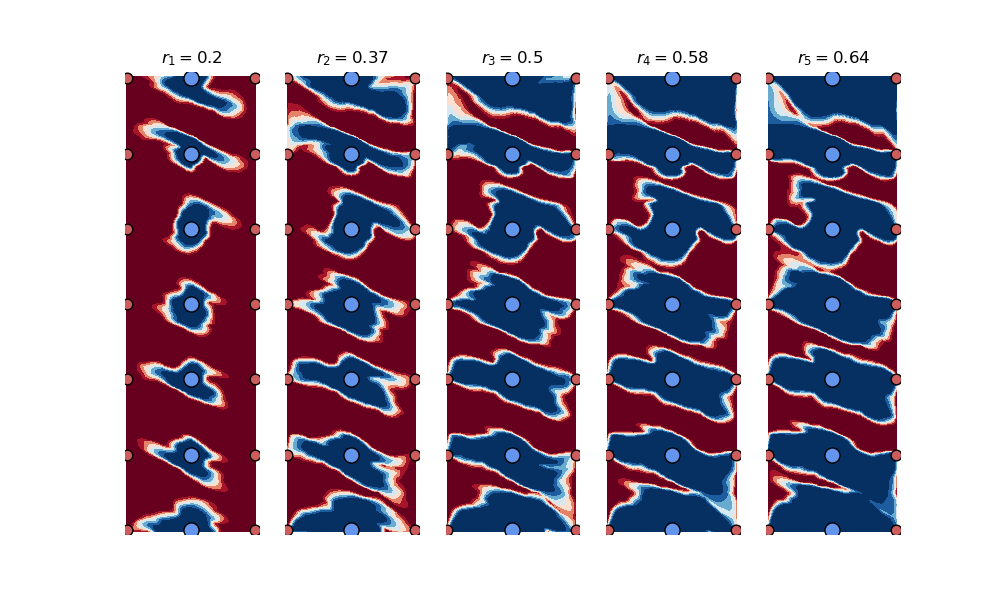

<IPython.core.display.Javascript object>


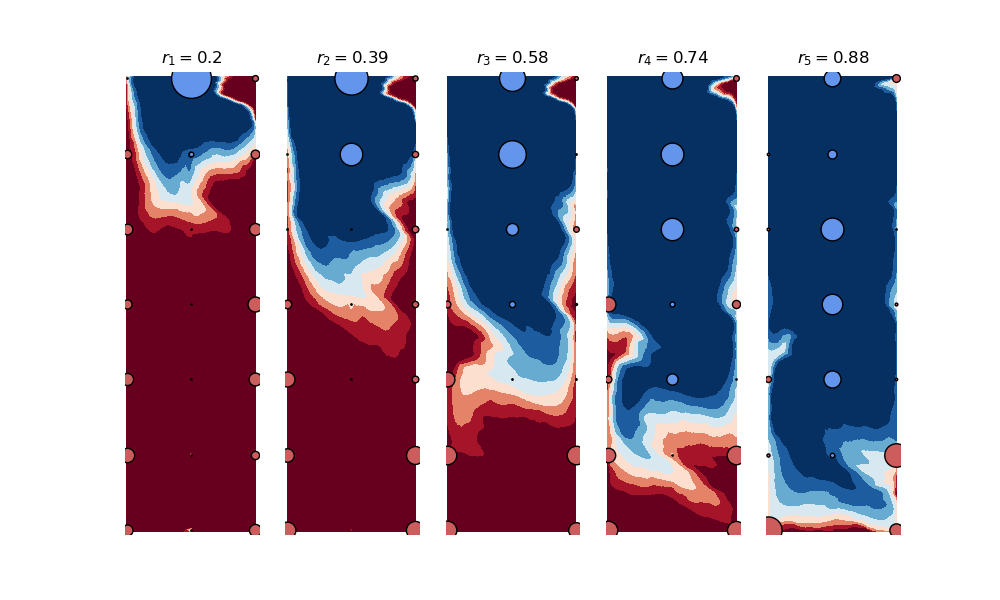

base: 0.6424299884280616
optimum: 0.88237795511644
% improvement: 37


<IPython.core.display.Javascript object>


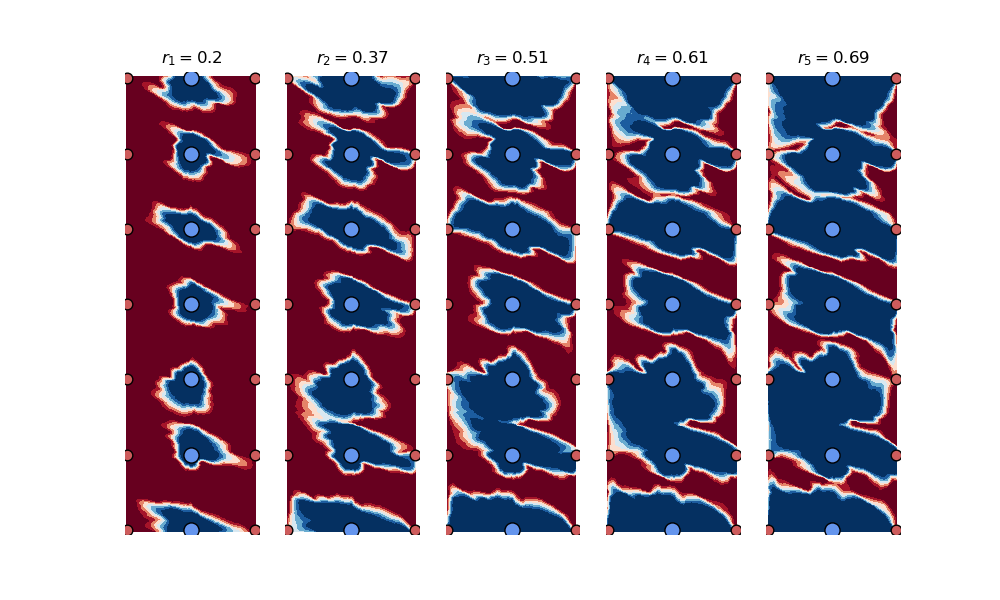

<IPython.core.display.Javascript object>


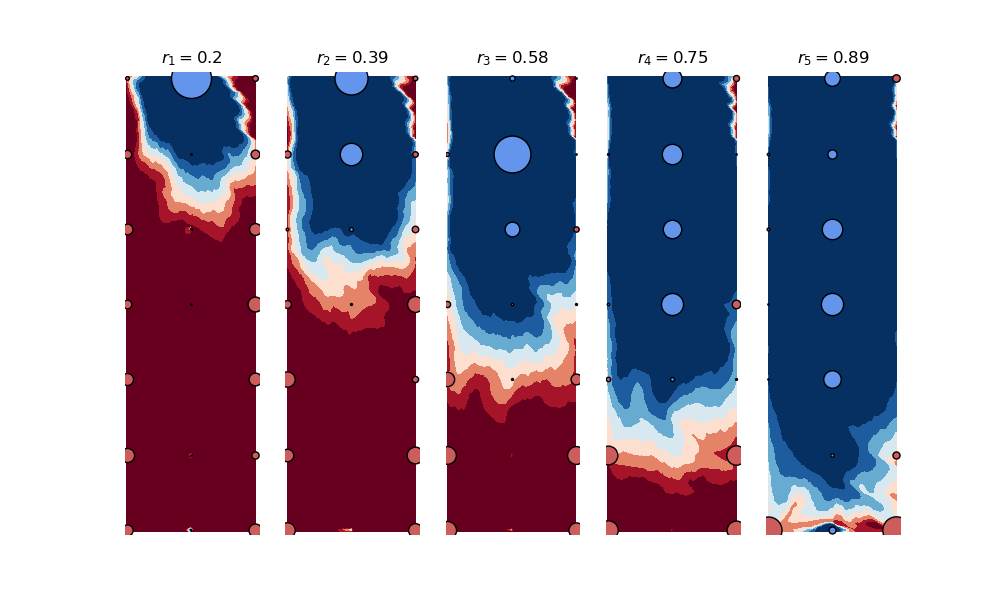

base: 0.693179247075004
optimum: 0.8900956462405598
% improvement: 28


<IPython.core.display.Javascript object>


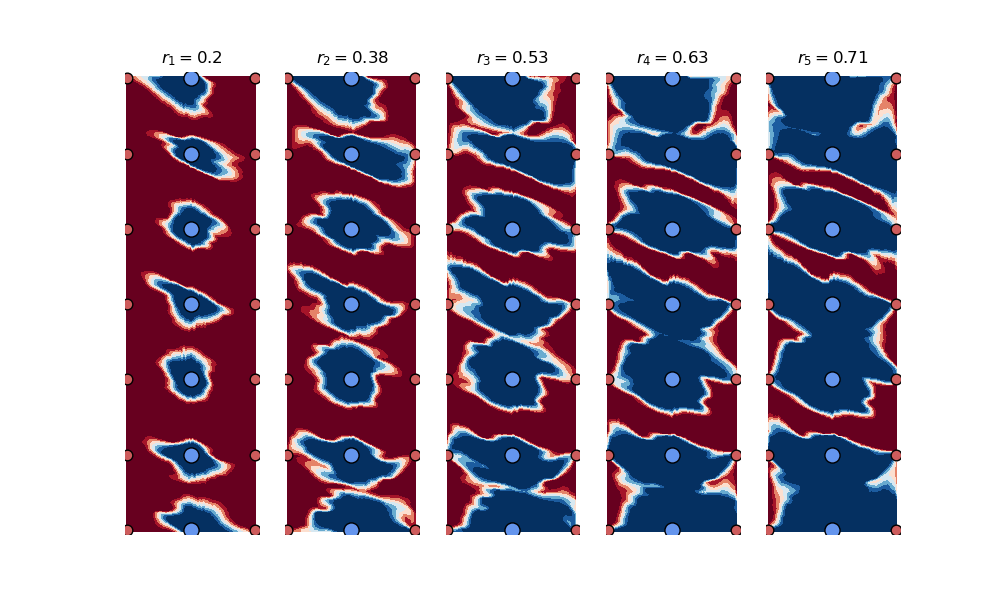

<IPython.core.display.Javascript object>


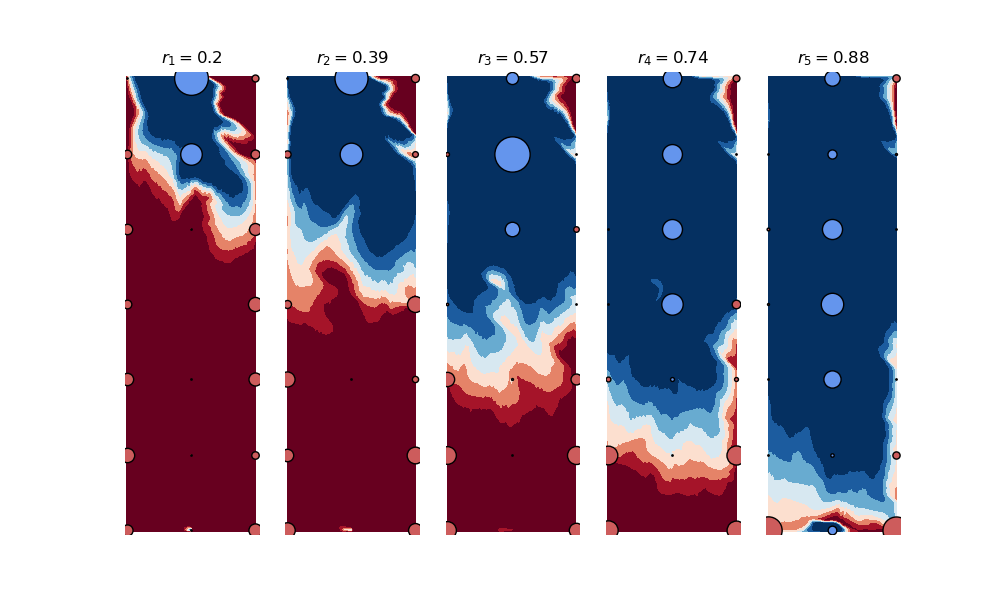

base: 0.710265675051384
optimum: 0.8825438552562123
% improvement: 24


In [5]:
base_array, opt_array = [], []

for idx in rl_indices:
    
    env = envs[idx]
    
    base_action = np.ones((env.ressim_params.terminal_step, env.action_space.shape[0]))
    states, actions, rewards = eval_actions(env, base_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                       s_max=0.8, s_min=0.2,
                       marker_size_ref=1, figsize_scale=6, show_wells=True)
    base_reward = sum(rewards)
    fig.savefig(img_dir+'/base_'+str(idx)+'.pdf')

    opt_action = np.load(opt_dir+'/ck_argmax_'+str(idx)+'.npy').reshape(env.ressim_params.terminal_step, -1)
    states, actions, rewards = eval_actions(env, opt_action)
    fig = plot_s_snapshots(states, actions, rewards, 
                           s_max=0.8, s_min=0.2,
                           marker_size_ref=1, figsize_scale=6, 
                           show_wells=True)
    opt_reward = sum(rewards)
    fig.savefig(img_dir+'/opt_'+str(idx)+'.pdf')
    
    base_array.append(base_reward)
    opt_array.append(opt_reward)
    
    print(f'base: {base_reward}')
    print(f'optimum: {opt_reward}')
    print(f'% improvement: {int(100*np.abs(base_reward-opt_reward)/base_reward)}')  

<IPython.core.display.Javascript object>


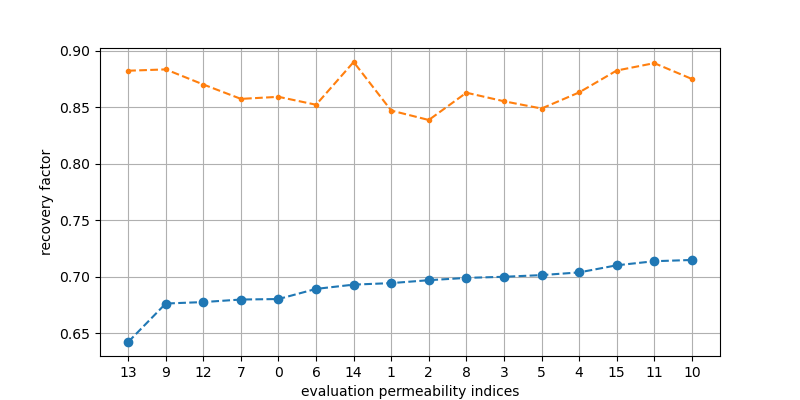

0.8661502785099535


In [6]:
fig, axs = plt.subplots(1,1,figsize=(8,4) )

sort_indices = np.argsort(base_array)

axs.plot(np.array(base_array)[sort_indices], 'o--')
axs.plot(np.array(opt_array)[sort_indices], '.--')
axs.set_ylabel('recovery factor')
axs.set_xlabel('evaluation permeability indices')
axs.set_xticks(rl_indices)
axs.set_xticklabels(sort_indices)
axs.grid('on')
plt.show()

print(np.mean(opt_array))

In [7]:
# with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
#     env = pickle.load(input)    
# env_half = generate_beta_environement(env, 0.5, env.p_x, env.p_y, seed)
# env_quarter = generate_beta_environement(env, 0.25, env.p_x, env.p_y, seed)

# env_array = [env, env_half, env_quarter]

# rs = []
# for env_ in env_array:
#     env_copy = deepcopy(env_)
#     k_list = env_.k_list
#     rs_beta = []
#     for i,k in enumerate(k_list):
#         env_copy.set_k(np.array([k]))
#         opt_action = np.load(opt_dir+'/ck_argmax_'+str(i)+'.npy').reshape(env.terminal_step, -1)
#         states, actions, rewards = eval_actions(env_copy, opt_action)
#         rs_beta.append(np.sum(rewards))
#     rs.append(rs_beta)
    
# fig, axs = plt.subplots(1,1,figsize=(8,4) )
# for r in rs:
#     print(np.mean(r))
#     axs.plot(np.array(r)[sort_indices], '.--')
# axs.set_ylabel('recovery factor')
# axs.set_xlabel('k\'')
# axs.legend(['beta=1.0', 'beta=0.5', 'beta=0.25'])
# axs.grid('on')